# Изучение закономерностей, определяющих успешность игр

# Описание проекта


Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данные

Датасет `games` включает в себя данные за 2016 год:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Цели исследования:

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Необходимо разобраться, какие платформы и жанры игр наиболее популярны, что стоит закупать и на что делать маркетинговую кампанию.


### Этап 1. Откроем файл с данными и изучим общую информацию
   * <a href='#step_1.1'> Открокем файл по адресу(/datasets/games.csv) и изучим данные</a>
   
   
### Этап 2. Подготовим данные
   * <a href='#step_2.1'>Заменим названия столбцов (приведём к нижнему регистру)</a>
   * <a href='#step_2.3'>Обработаем пропуски по необходимости</a>
   * <a href='#step_2.4'>Аббревиатура 'tbd' в столбцах с рейтингом. Отдельно разберём это значение и опишем, как его обработать</a>
   * <a href='#step_2.5'>Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец</a>
   * <a href='#step_2.end'>Вывод</a>
   
### Этап 3. Проведём исследовательский анализ данных
   * <a href='#step_3.1'>Посмотрим, сколько игр выпускалось в разные годы</a>
   * <a href='#step_3.2'>Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и постройте  распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы</a>
   * <a href='#step_3.3'>Возьмём данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.</a>
   
   * <a href='#step_3.4'>Определим какие платформы лидируют по продажам, растут или падают. Выберим несколько потенциально прибыльных платформ.</a>
   * <a href='#step_3.5'>Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.</a>
   * <a href='#step_3.6'>Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.</a>
   * <a href='#step_3.7'> Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.</a>
   * <a href='#step_3.8'>Соотнесём выводы с продажами игр на других платформах.</a>
   * <a href='#step_3.9'>Посмотрим на общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?</a>
   * <a href='#step_3.end'>Вывод</a>
   
### Этап 4. Составим портрет пользователя каждого региона
   * <a href='#step_4.1'>Определим для пользователя каждого региона (NA, EU, JP):</a>
       * <a href='#step_4.2'>Самые популярные платформы (топ-5). Опишем различия в долях продаж.</a>
       * <a href='#step_4.3'>Самые популярные жанры (топ-5). Поясним разницу.</a>
       * <a href='#step_4.4'>Влияет ли рейтинг ESRB на продажи в отдельном регионе?</a>
   * <a href='#step_4.end'>Вывод</a>
   
### Этап 5. Проверим гипотезы
   * <a href='#step_5.1'>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a>
   * <a href='#step_5.2'>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</a>
   * <a href='#step_5.end'>Вывод</a>
   
### Этап 6. Общий вывод
   * <a href='#step_6.end'>Вывод</a>
   ___
   

**1. Откроем файл с данными и изучим общую информацию**

Для начала сразу загрузим необходимые библиотеки.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

После чего начнем изучать данные датафрейма

In [2]:
try:
    data=pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
display(data)
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]
skips_in_data.sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Name: nans, dtype: int64

По итогам ознакомления с базой мы видим, что в 6 колонках есть пропуски, в базе присутствуют разные регистры, по дубликатам пока сказать ничего нельзя, но проверить будет необходимо. 

**2. Подготовим данные**

Изменим регистр данных как в наименовании столбцах, так и в самих строках. 

In [5]:
data.columns = data.columns.str.lower()
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

In [6]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


После этого проверим столбы с платформой, годом релиза и жанром на дубликаты.

In [7]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [8]:
print(data.duplicated().sum())

0


In [9]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [10]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [11]:
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

Мы определили дубли в столбце "Платформа", в остальных они отсутствуют. Можем приступать к обработке пропусков.

In [12]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы выяснили, что пропуски в стоблцах "жанр" и "название игры" одни и теже значения. Ввиду невозможности восстановить данные, а так же их малое число, отбрасываем их из датасета.

In [13]:
data.dropna(subset=['name'],inplace=True)

In [14]:
skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

skips_in_data.sort_values(ascending=False)

critic_score       8576
rating             6764
user_score         6699
year_of_release     269
Name: nans, dtype: int64

Разберемся с годом релиза. Исходя из опыта времяпровождения в компьютерных играх, могу сказать, что иногда в названиях игры пишется год релиза. Проверим такую возможность.

In [15]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Гипотеза подтверждается, однако опять же - если мы говорим о спортивных играх, то год релиза зачастую идет на 1 раньше, чем указано в названии. Есть предположение, что одна игра вышла на нескольких платформах и в одной из строк есть необходимая информация. Проверим.

In [16]:
data.query('name == "madden nfl 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,madden nfl 2004,xb,2003.0,sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,madden nfl 2004,gc,2003.0,sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,madden nfl 2004,gba,2003.0,sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [17]:
data.query('name == "fifa soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,fifa soccer 2004,xb,2003.0,sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,fifa soccer 2004,gc,2003.0,sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,fifa soccer 2004,gba,2003.0,sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [18]:
data.query('name == "lego batman: the videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,lego batman: the videogame,x360,2008.0,action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,lego batman: the videogame,ds,2008.0,action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,lego batman: the videogame,ps3,2008.0,action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,lego batman: the videogame,psp,NaN,action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,lego batman: the videogame,ps2,2008.0,action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,lego batman: the videogame,pc,2008.0,action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Вновь подтверждение. Отмечу, есть шанс того, что игра вышла условно в 2000 году на  xbox, а на РС была портирована позже. Однако не думаю, что данный факт сильно повлияет на анализ ввиду крайне малого количества подобных строк. 

In [19]:
data.loc[data['year_of_release'].isnull(), 'year_of_release'] = data.groupby('name')['year_of_release'].transform('max')


In [20]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,rock band,wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,rock band,ps3,NaN,misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,homeworld remastered collection,pc,NaN,strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,shorts,ds,NaN,platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,agarest senki: re-appearance,ps3,NaN,role-playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
data.query('name == "lego batman: the videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,lego batman: the videogame,x360,2008.0,action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,lego batman: the videogame,wii,2008.0,action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,lego batman: the videogame,ds,2008.0,action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,lego batman: the videogame,ps3,2008.0,action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,lego batman: the videogame,psp,2008.0,action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,lego batman: the videogame,ps2,2008.0,action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,lego batman: the videogame,pc,2008.0,action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Мы видим, что количество пропущенных позиций в датасете уменьшилось. Еще раз проверим общее число пропусков.


In [22]:
skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

skips_in_data.sort_values(ascending=False)

critic_score       8576
rating             6764
user_score         6699
year_of_release     146
Name: nans, dtype: int64

Вцелом 146 строк составляют менее 1% от общей базы, считаю что данными значениями можно пренебречь. 


In [23]:
data.dropna(subset=['year_of_release'],inplace=True)

skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

skips_in_data.sort_values(ascending=False)


critic_score    8492
rating          6699
user_score      6633
Name: nans, dtype: int64

Разберем рейтинг игр.


In [24]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [25]:
data['critic_score'].unique() 

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

In [26]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Мы увидели, что в оценке пользователя есть такое значение, как 'tbd'. 
'tbd' в рамках нашего исследования расшифровыватестя как 'To Be Determined' - "Будет определено". Другим словами это отсуствие значения. Выясним сколько в базе таких строк

In [27]:
data.loc[data['user_score'] == 'tbd']['user_score'].count()

2394

Отбросить их мы не можем, но и работать в таком формате так же не получится. Изменим эти строки на их суть - неизвестно, NaN


In [28]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [29]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Поменяем тип данных в строке на числовой, что бы в дальнейшем была возможность проводить математические операции.

In [30]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Так же откорректируем год релиза.

In [31]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format="%Y").dt.year

In [32]:
data.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [33]:
data["rating"] = data['rating'].fillna("unknown")

In [34]:
skips_in_data = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

skips_in_data.sort_values(ascending=False)

user_score      9027
critic_score    8492
Name: nans, dtype: int64

In [35]:
try:
    old_data=pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    old_data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.shape[0] / old_data.shape[0]    

0.991145677535148

Добавим новый стобцец - суммарные продажи игры на одной платформе. 

In [36]:
data['sum_sales'] = data['na_sales']+data['eu_sales']+data['other_sales']+data['jp_sales']

**Вывод**

По итогу предобработки данных мы сделали следующее:

- Избавились от двух практически полностью пустых строк.

- Выявили неявные дубликаты.

- Заполнили пропуска в "Годе релиза" там, где это возможно. Убрали те строки, которые заполнить не удастся.

- К сожалению, для чистоты анализа пришлось увеличить количество пустых значений в столбце "Оценка пользователя". Однако, так как изначальное значение 'tbd' и подразумевает в себе отсутствие рейтинга, на сам анализ это не повлияет.

- Преобразовали в более подходящие типы данных "Год релиза" и "Оценка пользователя".

- Убедились, что после всех операций, количество базы сократилось менее чем на 1%.

- Добавили новый столбец с суммарными продажами игры на 1 платформе.

Касательно трех оставшихся столбцов с пропусками, а именно оценки от критиков и пользователей, а также рейтинг игры. Данную информацию невозможно заполнить, используя данные базы. Причина пропусков может быть довольно разной - очень ранний год выхода игры, например до пупинизации рейтингов, отсутствие интереса к игре от критиков и игроков, ошибка в базе. В любом случае я не вижу способов отработать данные позиции.
Можно приступать к анализу данных.



**4. Проведём исследовательский анализ данных**

Повторим основные цели анализа.

   * <a href='#step_3.1'>Посмотрим, сколько игр выпускалось в разные годы</a>
   * <a href='#step_3.2'>Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим  распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы</a>
   * <a href='#step_3.3'>Возьмём данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.</a>
   
   * <a href='#step_3.4'>Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.</a>
   * <a href='#step_3.5'>Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.</a>
   * <a href='#step_3.6'>Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.</a>
   * <a href='#step_3.7'> Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.</a>
   * <a href='#step_3.8'>Соотнесём выводы с продажами игр на других платформах.</a>
   * <a href='#step_3.9'>Посмотрим на общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?</a>
   * <a href='#step_3.end'>Вывод</a>


**Изучим общее количество выхода игр по году выпуска.**

In [37]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


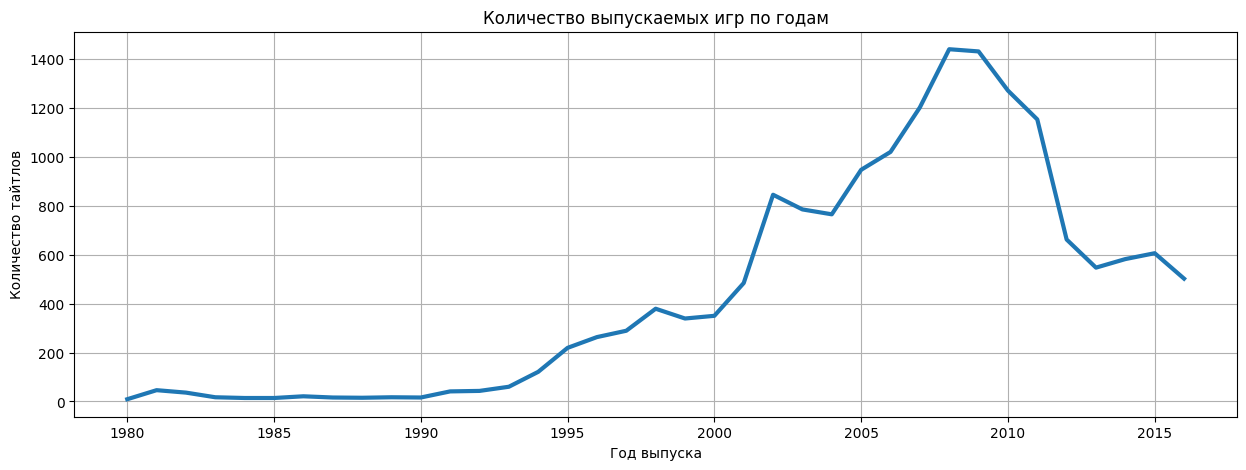

In [38]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').query('year_of_release > 0').plot(figsize=(15,5), grid=True, title='Количество выпускаемых игр по годам',legend=False, linewidth=3)
plt.ylabel('Количество тайтлов')
plt.xlabel('Год выпуска')
plt.show()

На всякий случай должен упомянуть, говоря о количестве игр, мы подразумеваем и мультиплафторму - одна игра могла выходить несколько раз на консолях и ПК. 

В целом по графику видно, что резкий подъем начинается к 1995 году, пиком скорее всего является 2007 год, затем резкий спад.

Связать это можно с несколькими факторами. Во-первых, 2008 год - год начала мирового экономического кризиса.
Во-вторых, игровая индустрия после 2000 была похожа на мыльный пузырь, когда огромное количество инвесторов вливали деньги в игры и зачастую они не были хорошего качества.
После 2010 года и сокращения инвестиций, был найден новый рынок - мобильные игры.


**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы**

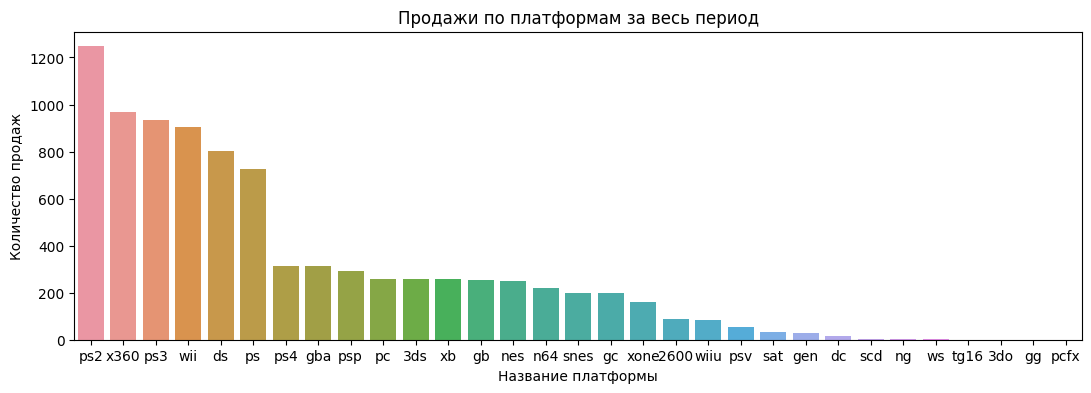

In [39]:
sales_on_platform = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['sum_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж");

Из данного графика видно, что наибольшее количество продаж за весь период на платформах PS2, WII, X360, PS3, DS, PS.
Однако, важно понимать, что эта выборка не совсем правильная. Времени, которое было у PS2 (вышла в 2000 г), PS3 (вышла в 2006), и PS4 (2013) крайне отличается. С другой стороны, некоторые платформы вышли до игрового бума 2000-ых, а значит они потеряли свою актуальность. 

Построим графики для каждой из платформ.


In [40]:
platform_grouped = sales_on_platform.reset_index()

In [41]:
top_platforms_list = platform_grouped['platform'].unique()
top_platforms_list

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', 'pc',
       '3ds', 'xb', 'gb', 'nes', 'n64', 'snes', 'gc', 'xone', '2600',
       'wiiu', 'psv', 'sat', 'gen', 'dc', 'scd', 'ng', 'ws', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

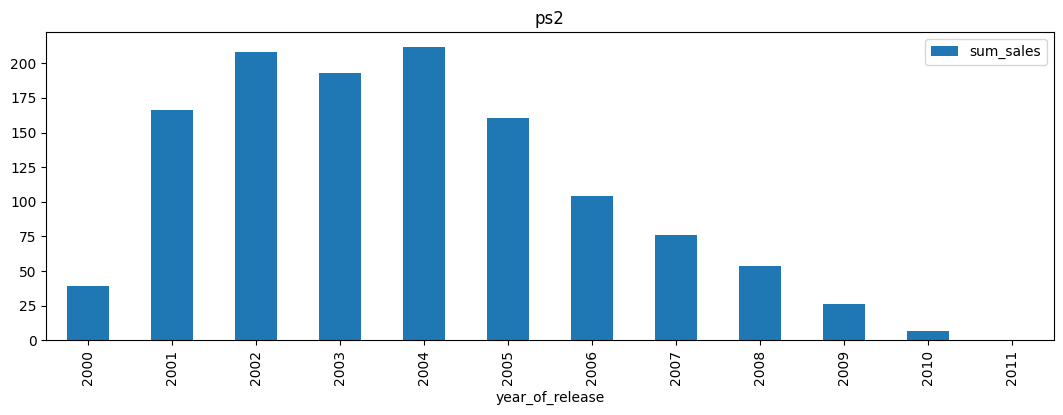

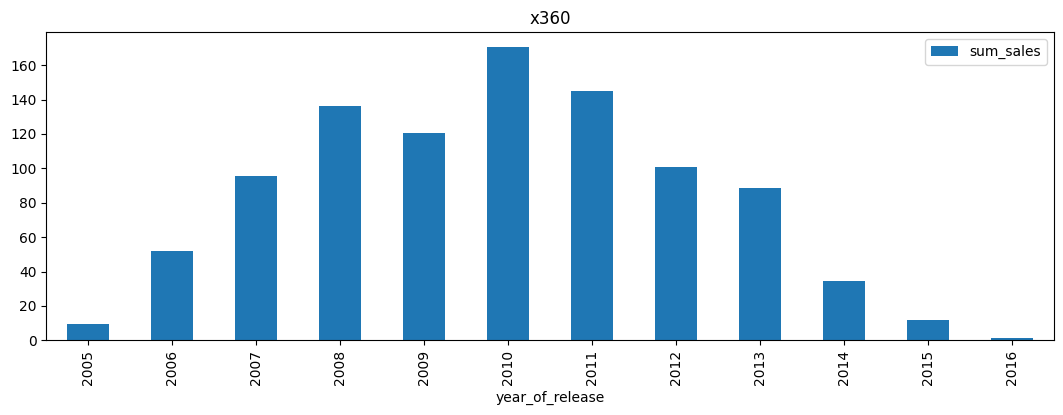

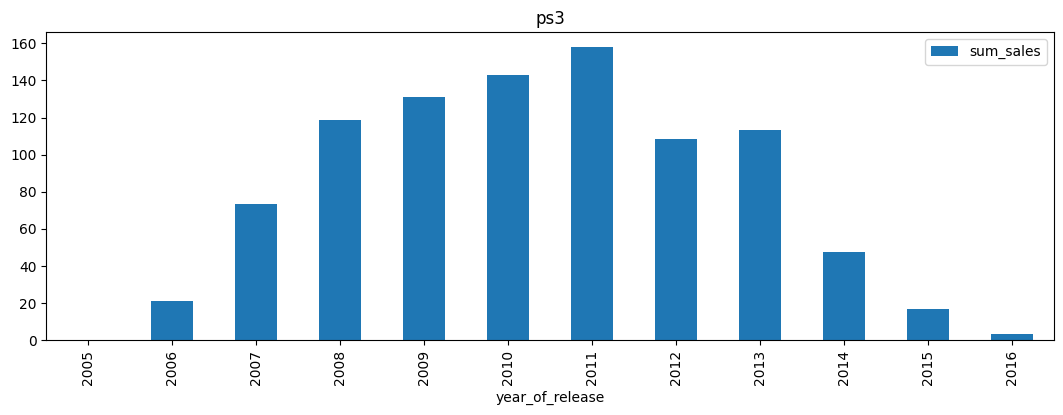

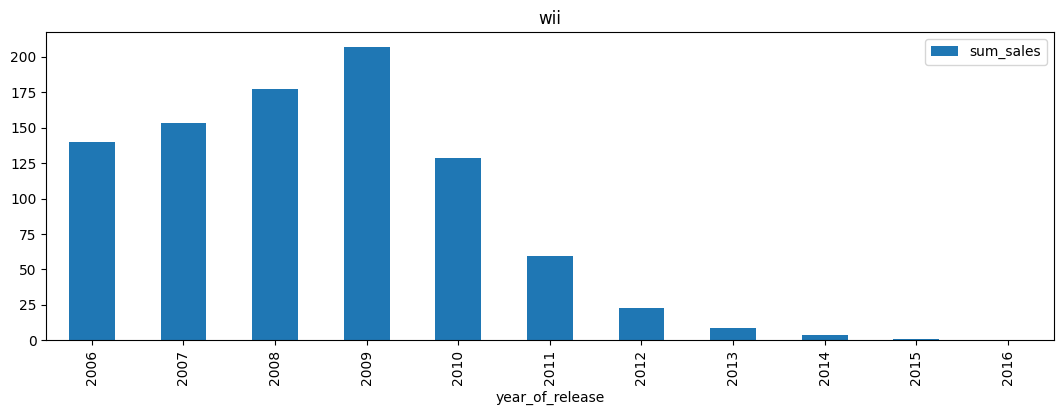

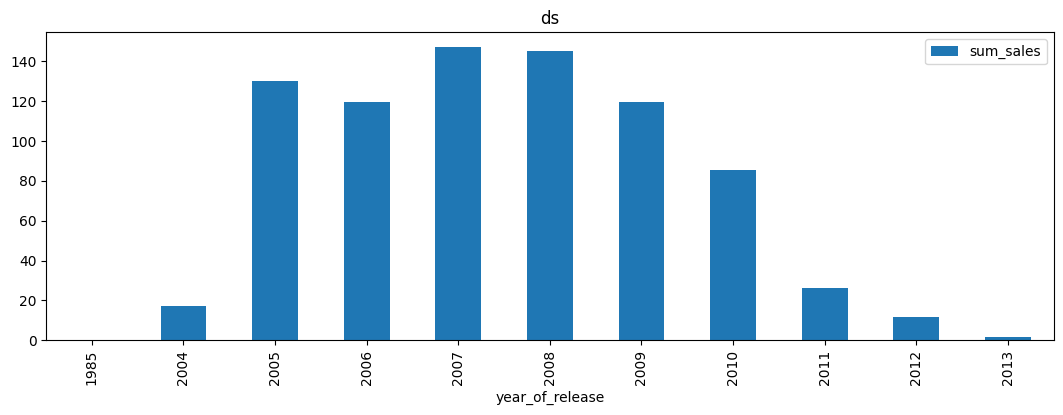

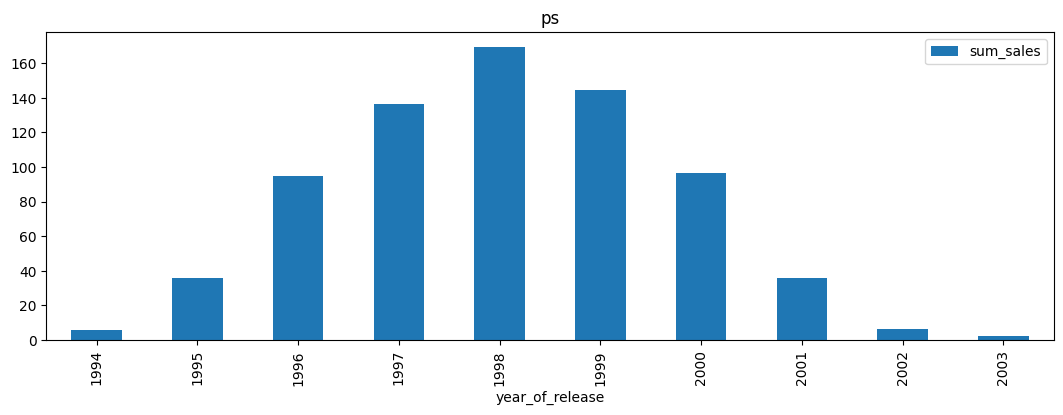

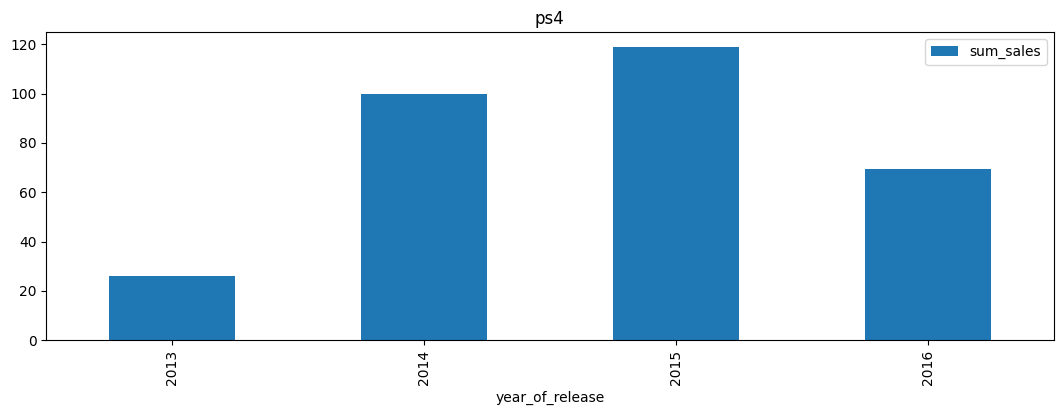

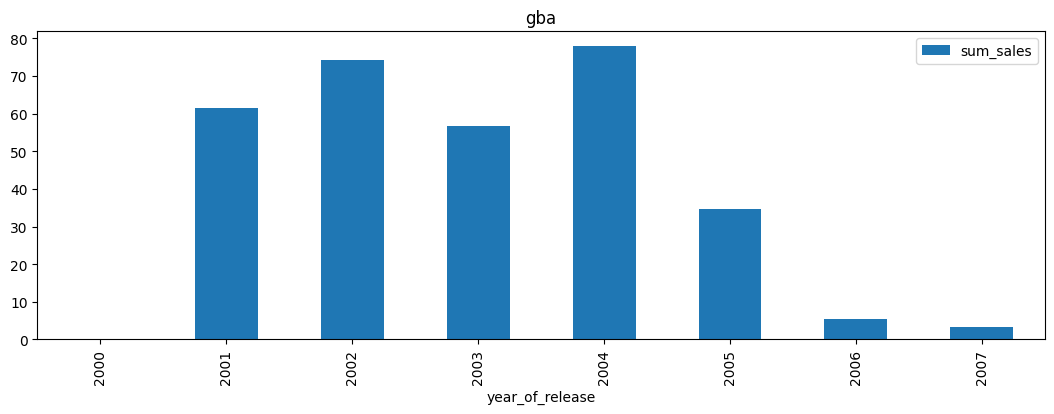

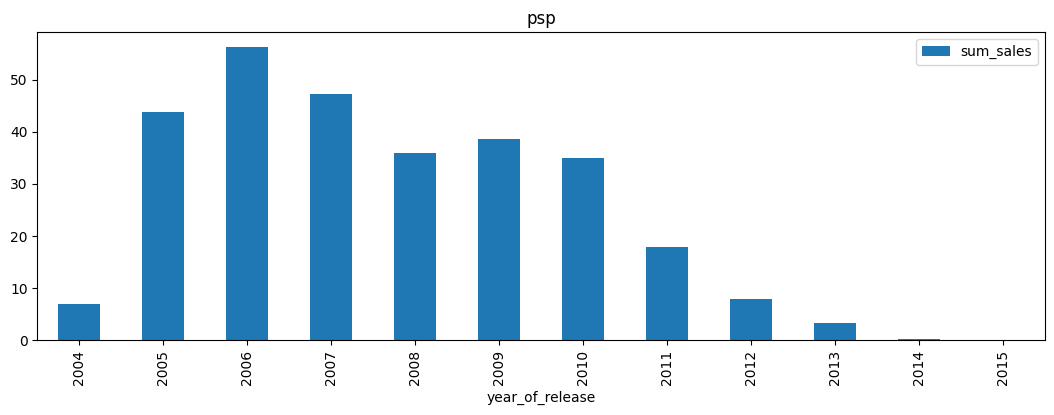

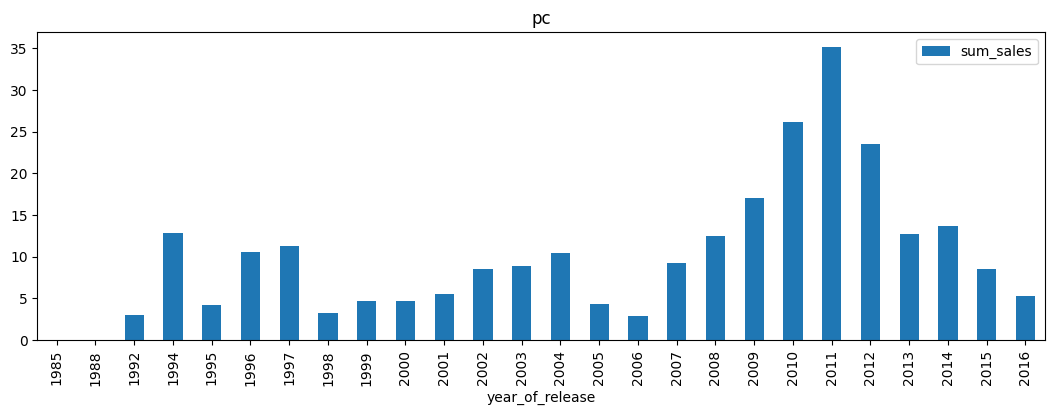

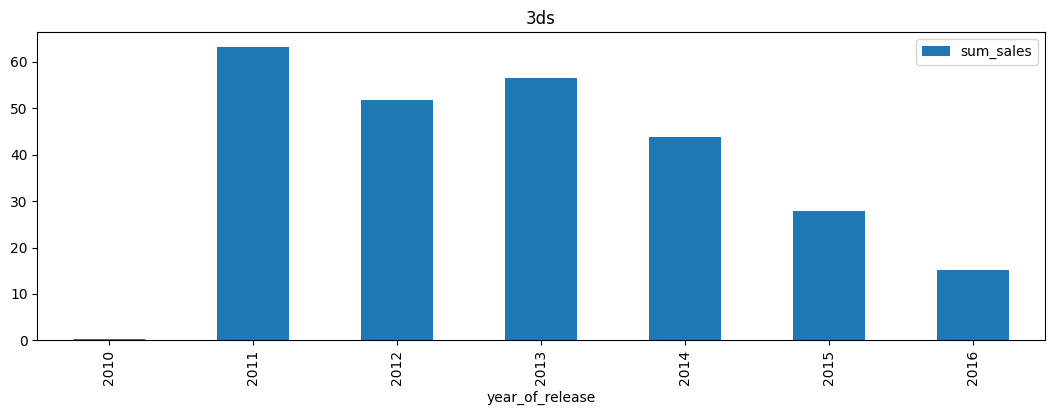

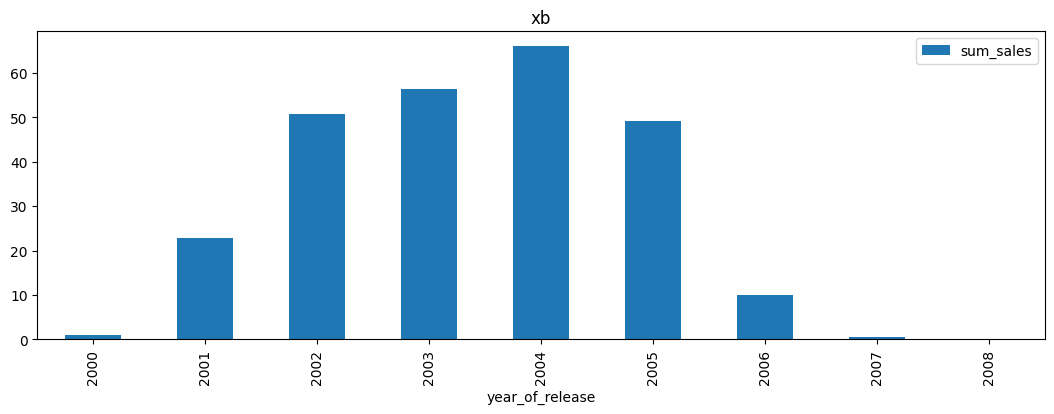

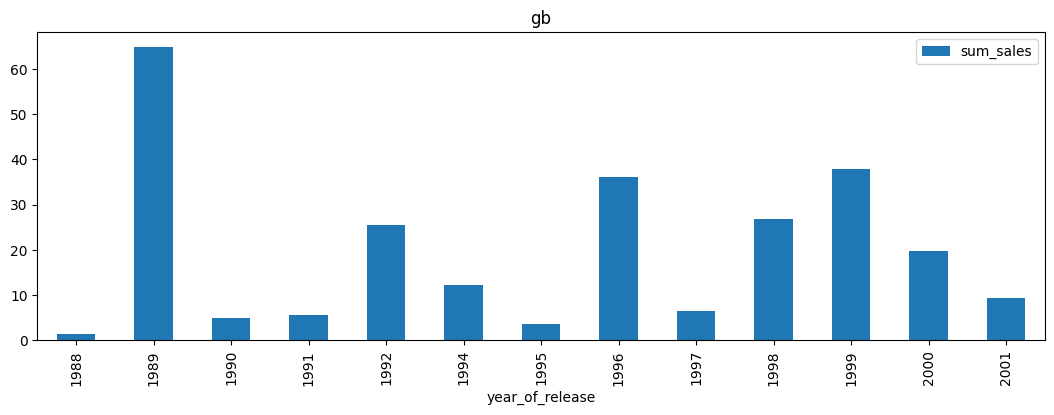

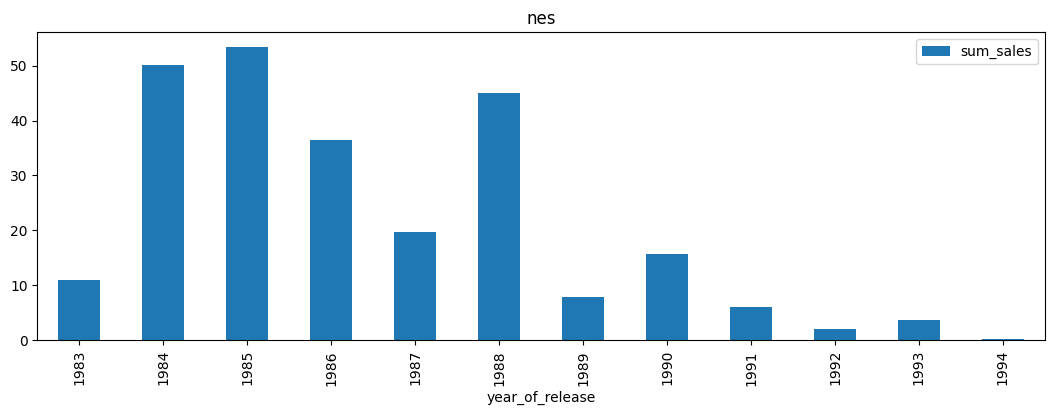

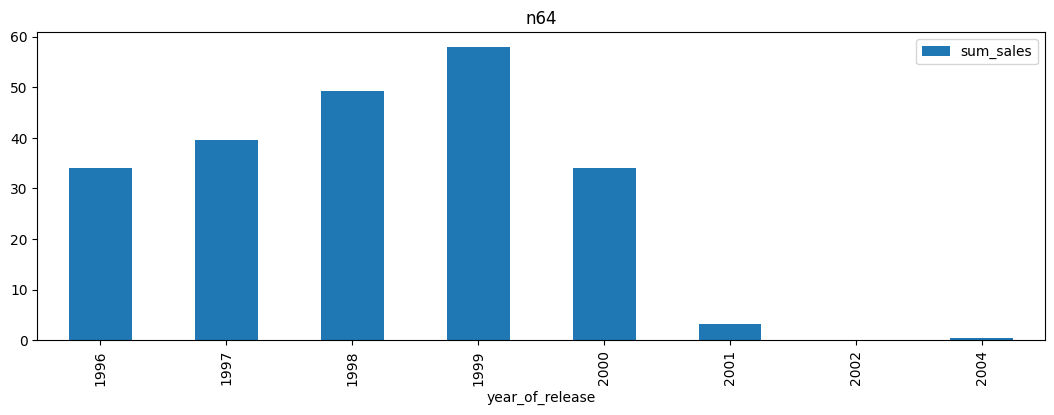

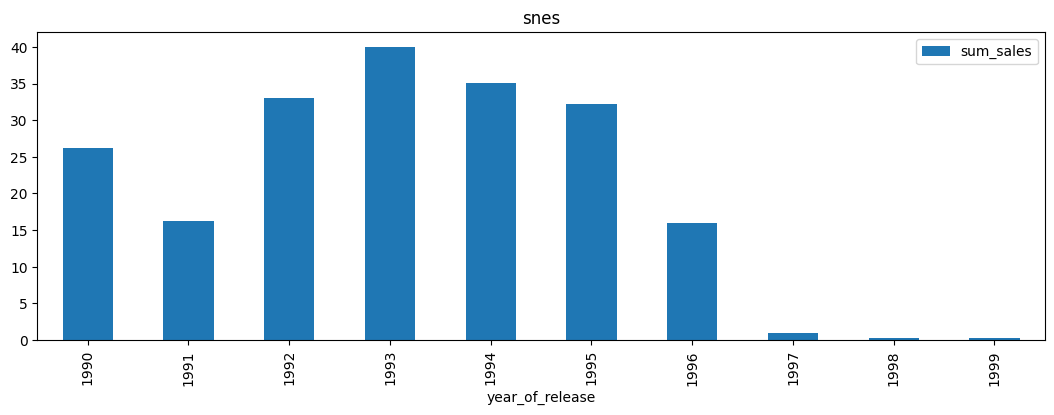

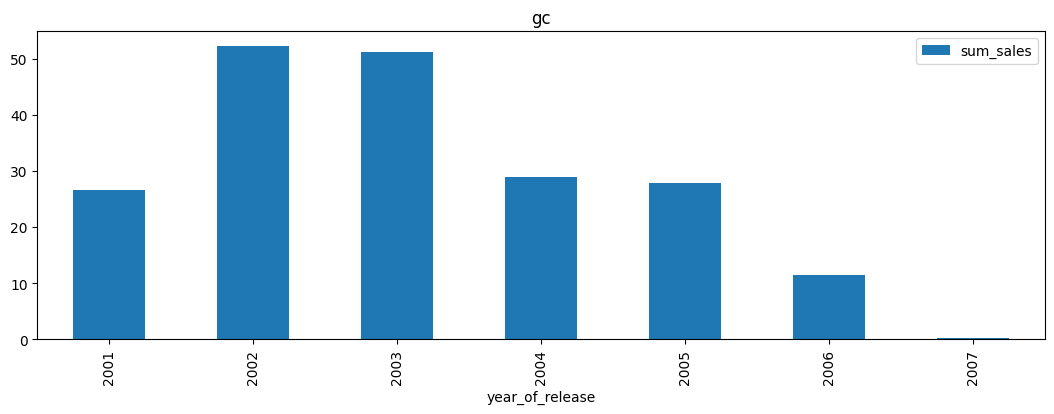

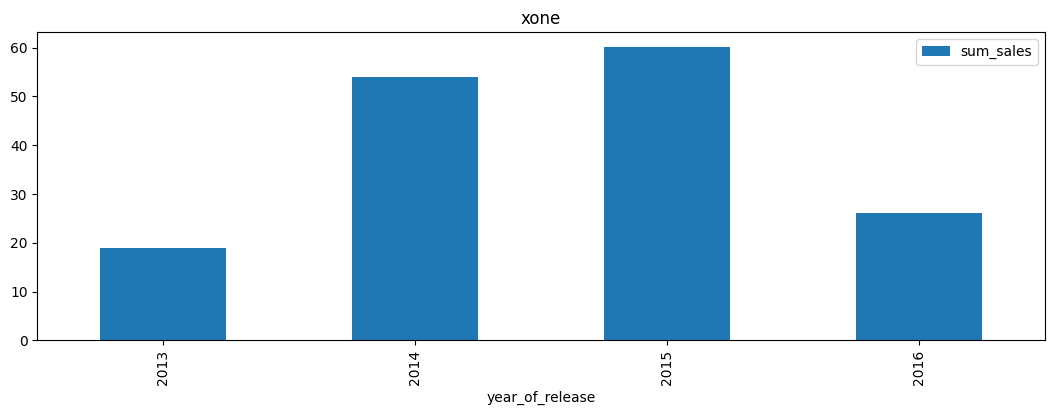

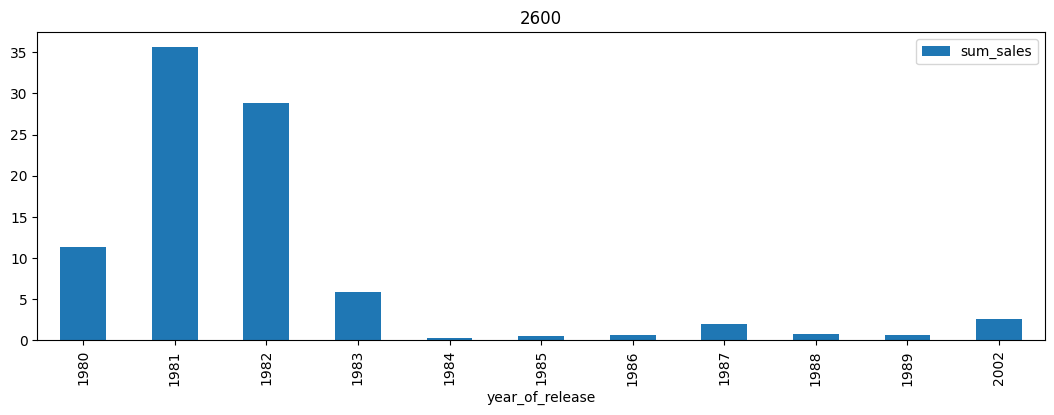

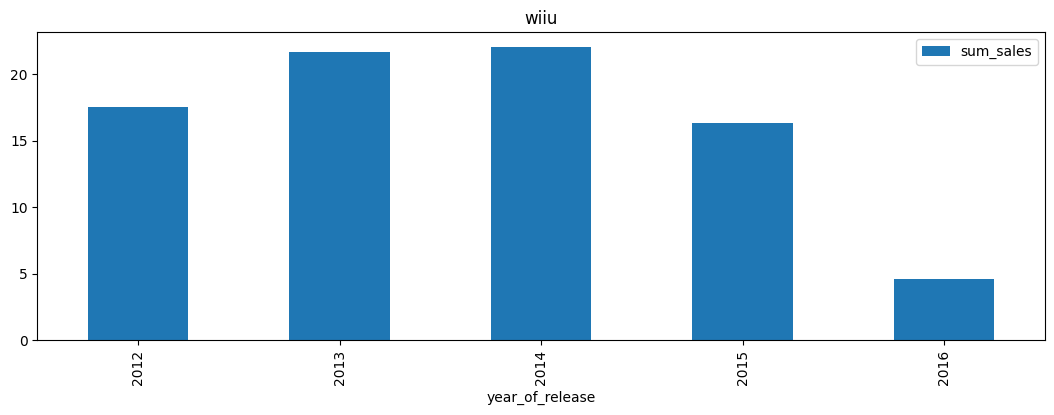

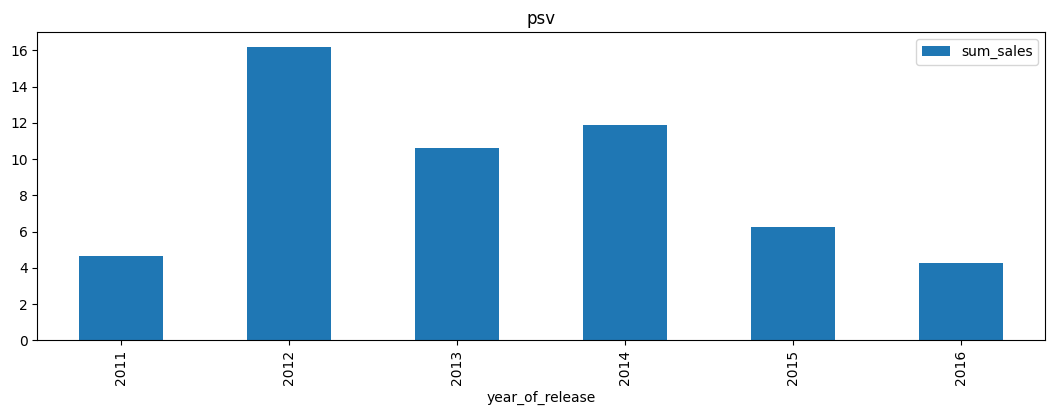

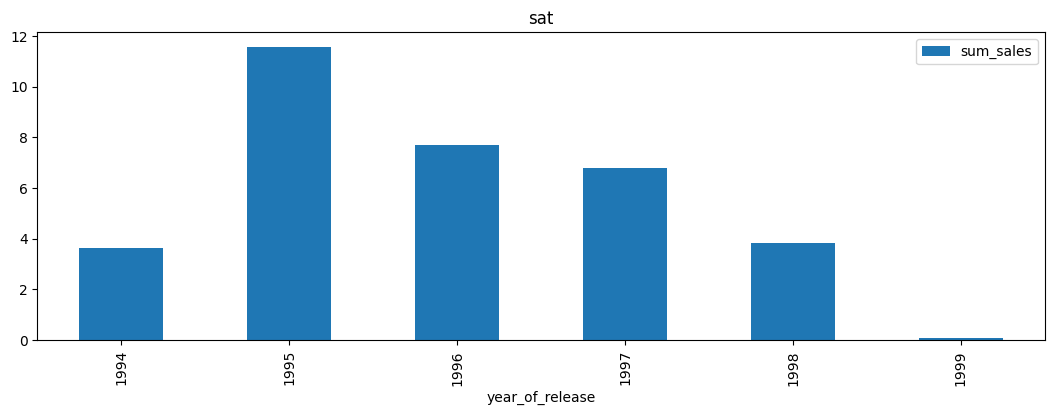

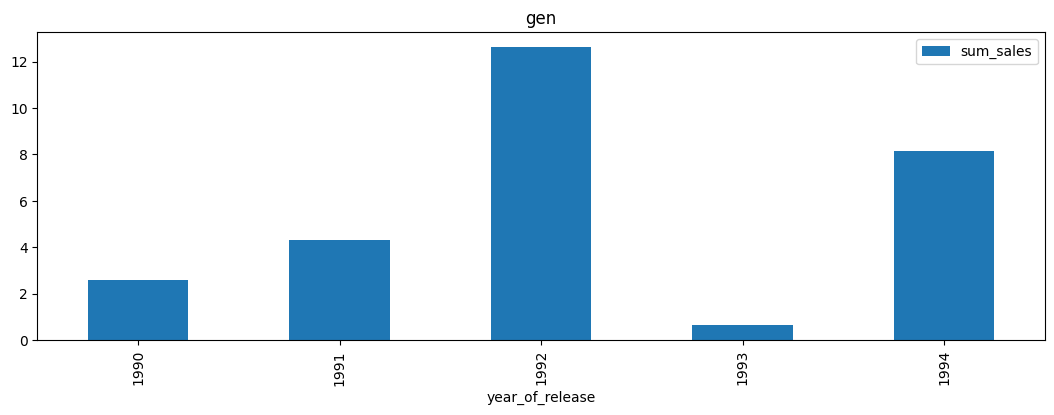

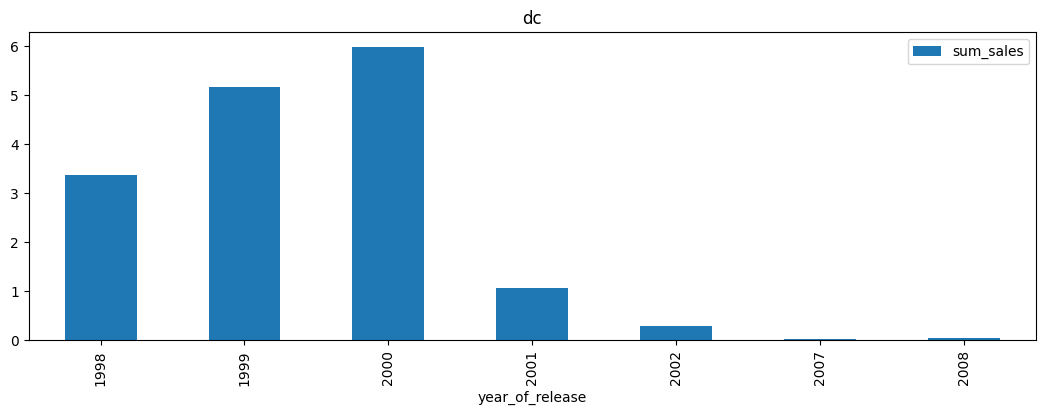

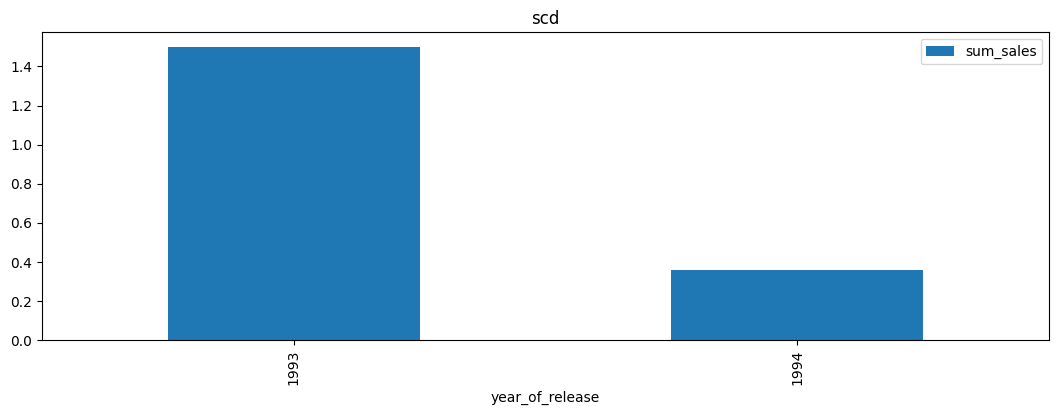

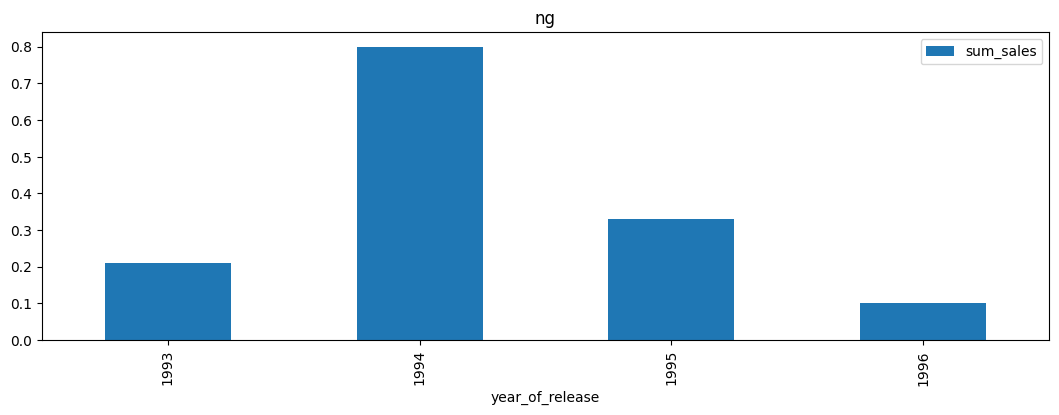

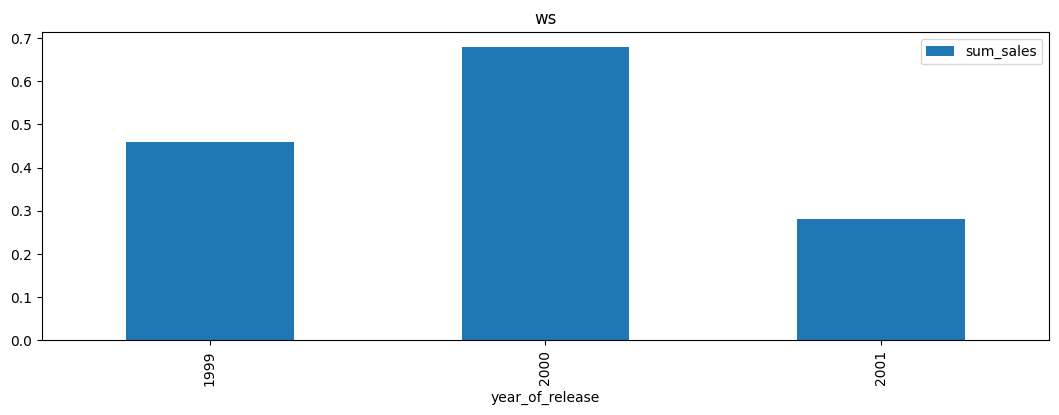

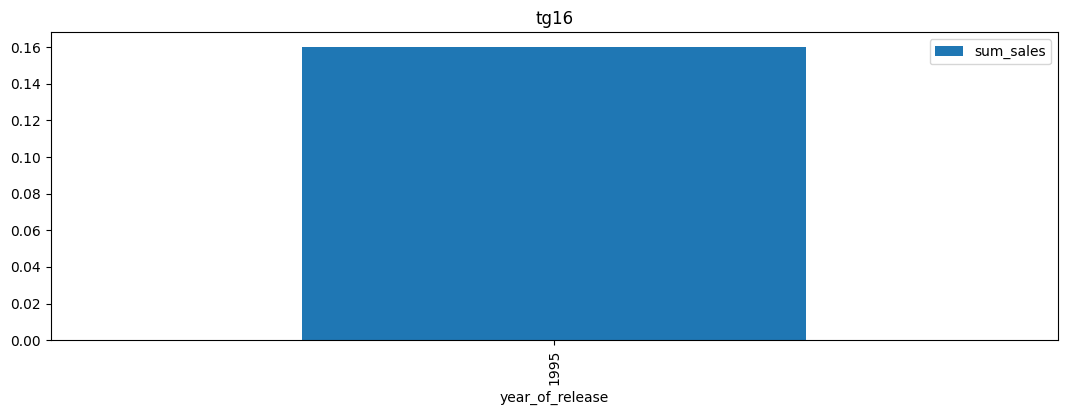

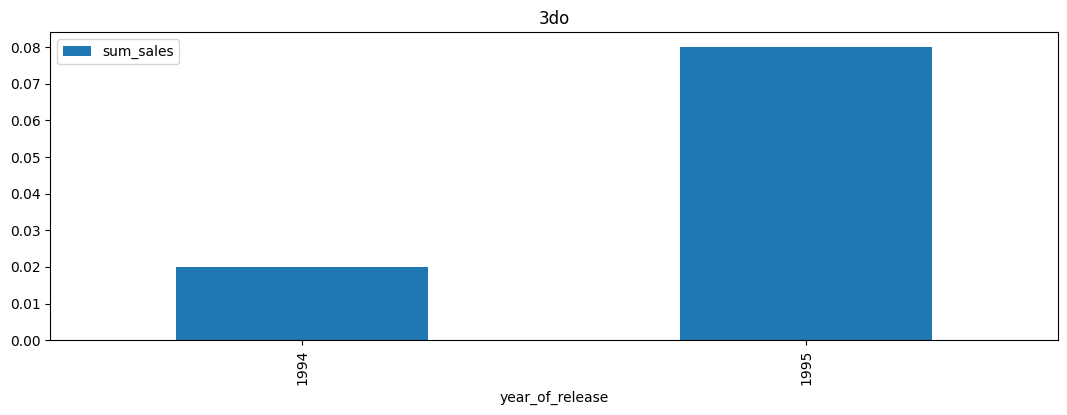

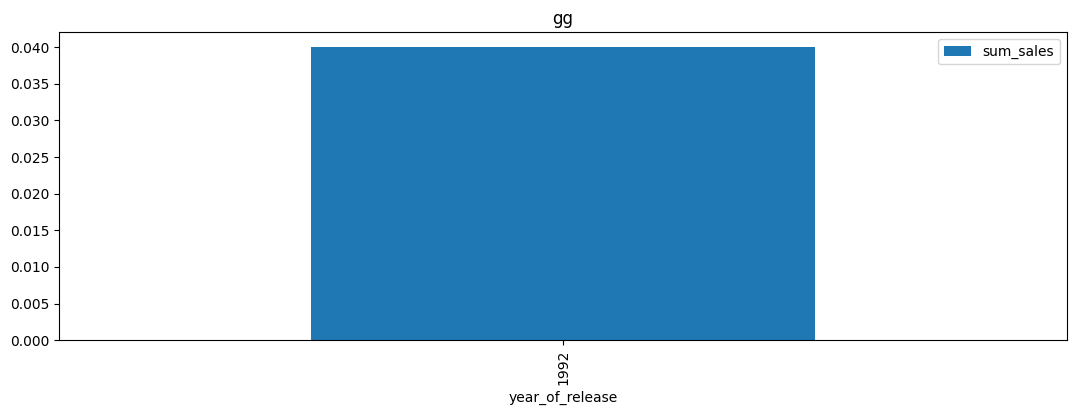

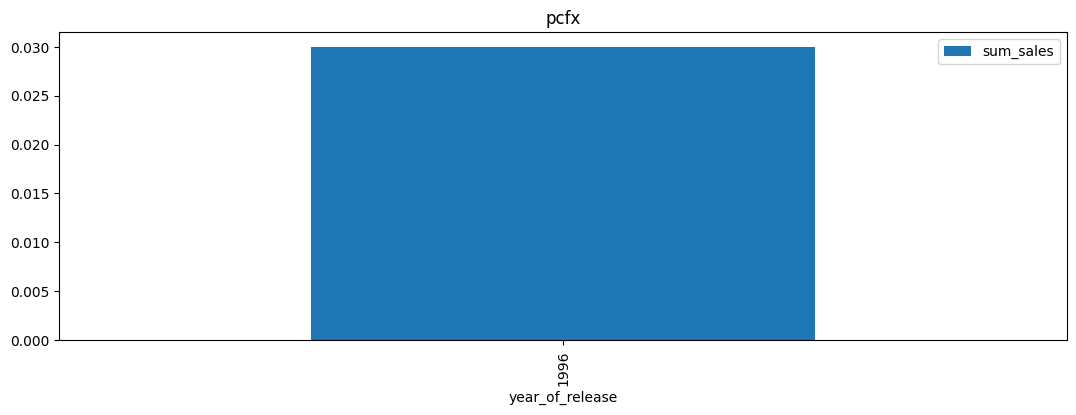

In [42]:
for platform in top_platforms_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

**Вывод**

Данные графики подтверждают мой предыдущий вывод, яркими примерами будут такие платформы как scd, ng, ws, tg16, 3do, gg, pcfx. 

Однако благодаря данному исследованию мы выяснили, что средний срок жизни игровой консоли составляет +- 6 лет. Да, они могут находиться на рынке и дольше, однако выход новых, более актуальных версий, приводит к сокращению разработки и продаж игр на данной платформе. Пример PS2 и PS3.

Существуют некоторые игровые платформы, которые не смогли стать популярными, их цикл жизни до 3-4 лет. 

Исключением можем назвать PC, ввиду возможности постоянной и разнообразной модернизации, в отличии от унифицированных платформ.


И все же выведем ТОП 5 за все время

In [43]:
top_5_platforms = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)
top_5_platforms

,platform,sum_sales
0,ps2,1247.16
1,x360,966.61
2,ps3,935.19
3,wii,903.31
4,ds,804.28


Лидером по продажам была PS2, вышедшая в 2000в Японии н 4 марта 2000 г., в Северной Америке — 26 октября 2000 г., в Европе — 24 ноября 2000 года, в России — 7 ноября 2002 года. Это соответствует графику выхода игр, так как платформа стала актуальной как раз на момент бума игровой индустрии. 

На момент среза базы начинают набирать популярность такие платформы как PS4 и XBOX ONE

**Возьмём данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.**


Если исходить из среднего цикла жизни платформ и даты среза 2016 года, то считаю актуальным брать данные от 2008 года - 6 лет актуальность жизни платформы 2 - 4 года на остаточные продажи после выхода нового поколения. Однако тогда мы зацепим и те платформы, которые на момент среза базы перестали быть актуальным. Считаю, что оптимальным вариантом будет 2013-2016 года, т.к. этот промежуток является переходным между консолями старого и нового поколения.

In [44]:
decline_period_data = data[data['year_of_release'] >= 2013]
decline_period_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2237 non-null   object 
 1   platform         2237 non-null   object 
 2   year_of_release  2237 non-null   int64  
 3   genre            2237 non-null   object 
 4   na_sales         2237 non-null   float64
 5   eu_sales         2237 non-null   float64
 6   jp_sales         2237 non-null   float64
 7   other_sales      2237 non-null   float64
 8   critic_score     994 non-null    float64
 9   user_score       1195 non-null   float64
 10  rating           2237 non-null   object 
 11  sum_sales        2237 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 227.2+ KB


In [45]:
decline_period_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,call of duty: ghosts,ps3,2013,shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,minecraft,x360,2013,misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [46]:
decline_period_data['platform'].unique()

array(['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

Мы видим, что у нас достаточно строчек для анализа, в базу попали как прошлое поколение консолей (на момент среза), так и новые. Выстроим еще раз графики конкретно для них.

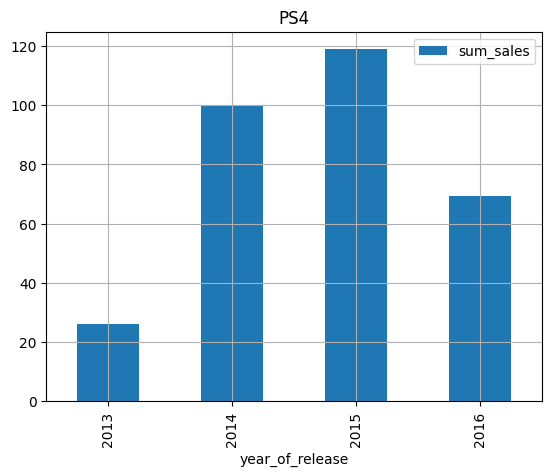

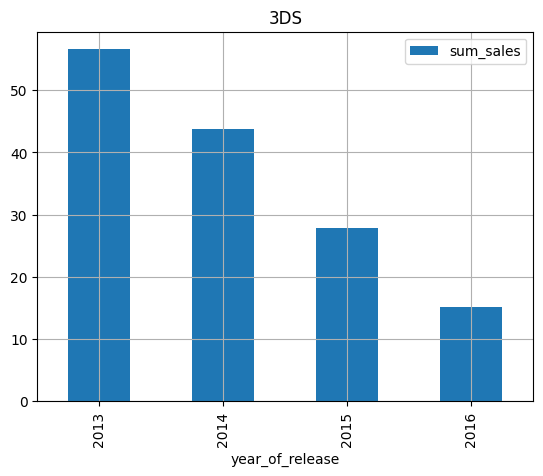

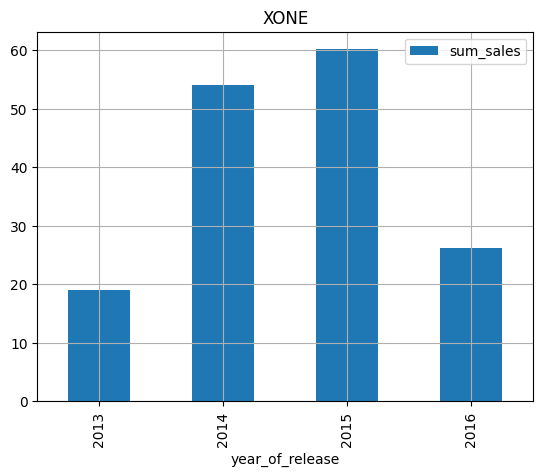

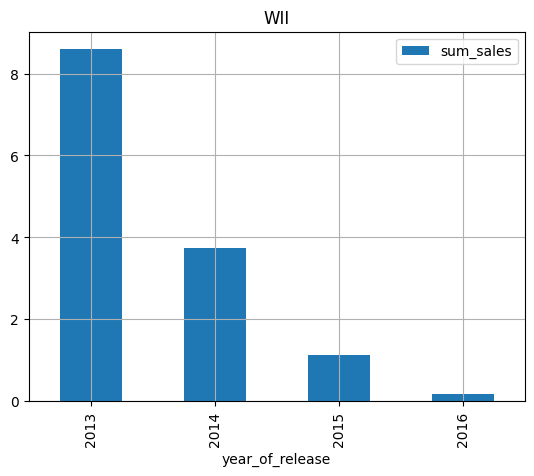

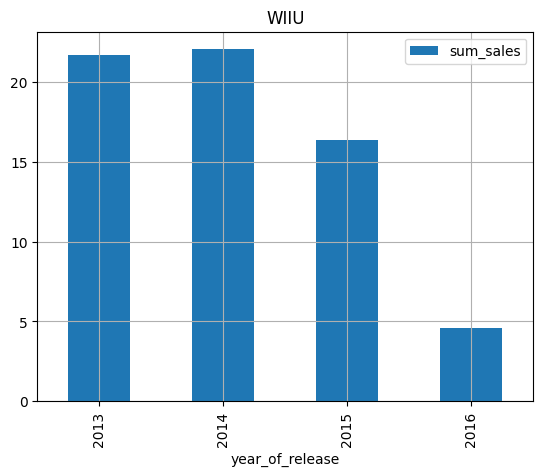

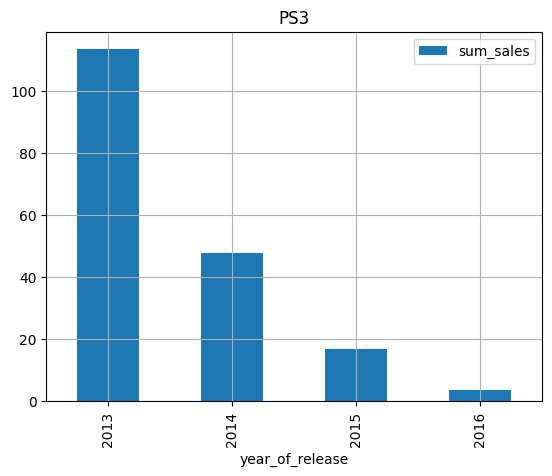

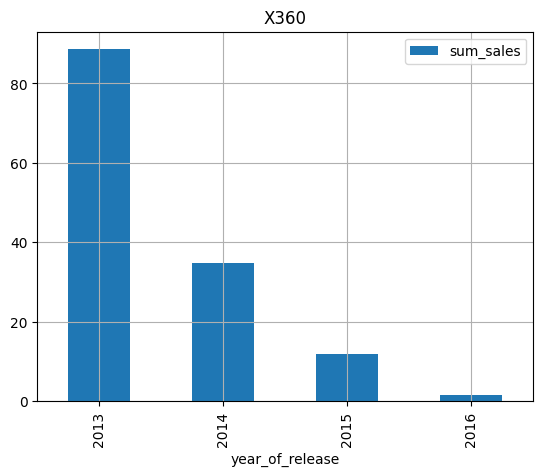

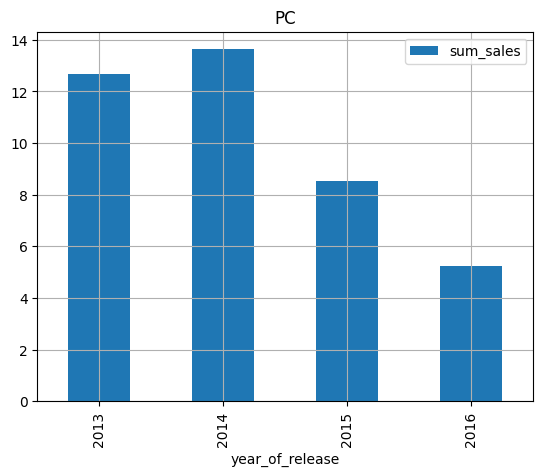

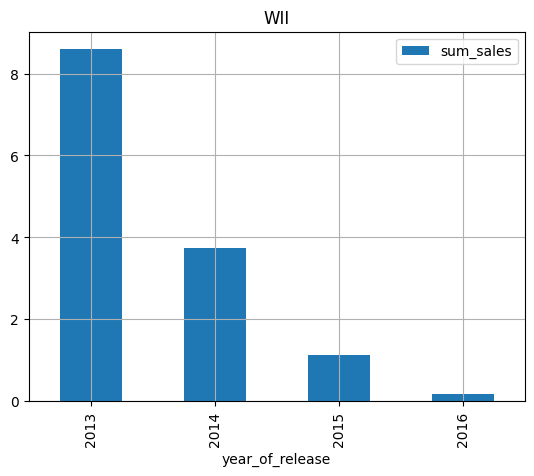

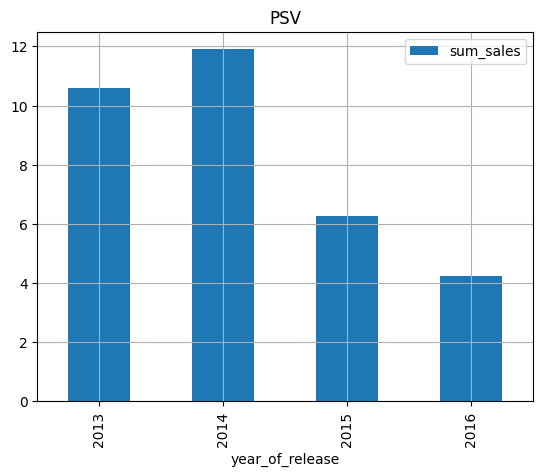

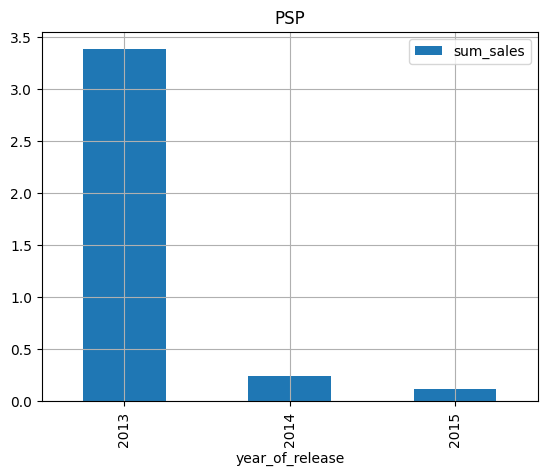

In [47]:
platforms = ['ps4', '3ds', 'xone', 'wii', 'wiiu', 'ps3', 'x360', 'pc', 'wii', 'psv', 'psp']
for platform in platforms:
    # Фильтруем данные для текущей платформы и строим сводную таблицу
    platform_data = decline_period_data.query(f'platform == "{platform}"')
    pivot_table_data = platform_data.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
    
    # Строим график
    pivot_table_data.plot(y='sum_sales', kind='bar', grid=True)
    plt.title(platform.upper())
    plt.show()

Рассмотрим каждый график по отдельности и сделаем выводы:
    
**PS4**

Платформа вышла в конце 2013 когда, из-за чего мы видим малое количество продаж 2014 год - резкий подъем вплоть до 2016. Подъем можно объяснить как возрастающим интересом к новому поколению, так и угасающему к старому. Плюс зачастую платформы не берут на старте продаж, так как в свое время, наученные провальным выходом XBOX360, пользователи опасаются брать сразу новые платформы. Берем это высказывание как аксиому и не будем объяснять её повторно. 
Может казаться, что в 2016 году произошел резкий спад. Мы могли бы объяснить это угасанием интереса, однако мы знаем, что средний срок жизни платформы минимум 6 лет, так что делаю вывод - срез базы происходил до конца 2016 года.

**3DS**

Платформа вышла в 2011 году. На момент среза базы подходил к концу цикл жизни платформы, что мы и подтверждаем графиком.

**XOne**

Аналогичная ситуация с PS4, платформа вышла в конце 2013 года. При этом мы можем заметить, что популярность консоли значительно меньше, чем у её главного конкурента - опять же, момент с провальным выпуском предыдущего поколения.

**Wii**

Аналогично 3ds, платформа вышла в 2012 году. Интерес гаснет.

**WiiU**

Вышла в 2012 г., цикл жизни подходит к концу.

**PS3**

Угасающая консоль, вышла в 2006 году. После выхода новой консоли мы видим резкое падение интереса.

**XBOX 360**

Аналогичная ситуация.

**PC**

Самая неоднозначная ситуация. Мы не можем объяснить падение интереса к играм на платформе из-за смены поколений, т.к. компьютер всегда модернизируется. 
Однако важно отметить и другие факторы: 10-ые годы были расцветом игр на мобильных платформах, игр в соцсетях, F2F (free to play, условно бесплатных) игр. В целом убежден, что платформу нельзя списывать со счетов, однако мы видим, что продажи на игровых консолях значительно выше. 

Можно так же упомянуть, что с 2014 года набирает популярность добыча криптовалюты - цены на комплектующие для компьютеров резко растут, не все люди способны позволить себе новое железо, а следовательно, угасает интерес к ПК и поднимается к фиксированным консолям.

**PSV** 

Консоль вышла в 2011 году, интерес гаснет. 

**PSP**

Консоль вышла в 2004 году, интерес угас.


Подводя итог можно сказать, что актуальными платформами можно назвать PS4, XOne, и ПК

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.**

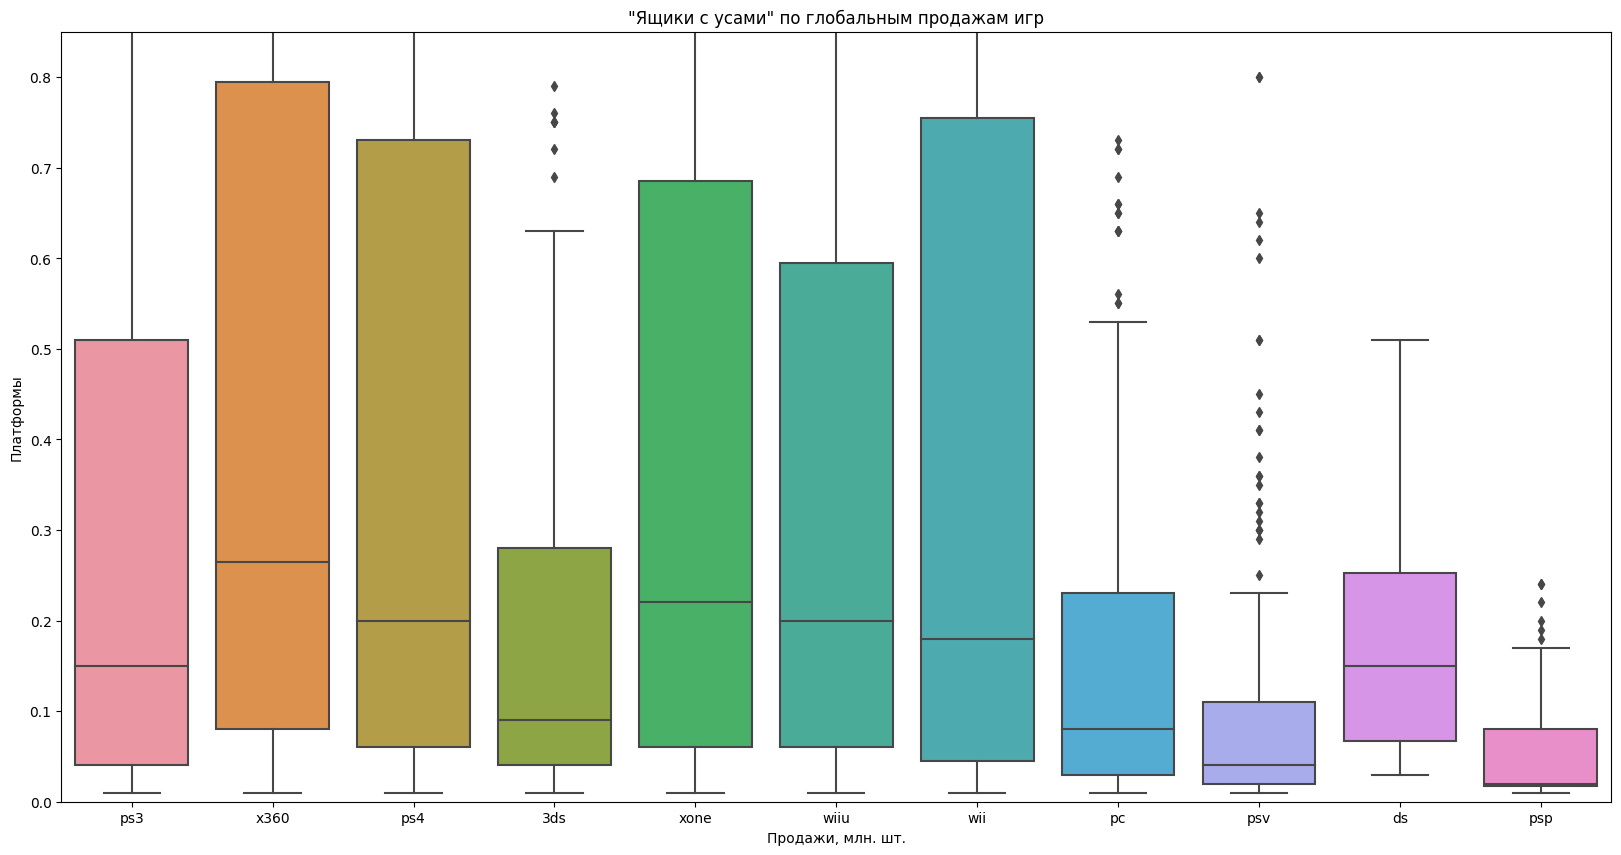

In [48]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=decline_period_data, x='platform', y='sum_sales')

plt.ylim(0, .85)

plt.title('"Ящики с усами" по глобальным продажам игр')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Платформы')

plt.show()

In [49]:
decline_period_data.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
ds,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
pc,192.0,0.208646,0.349801,0.01,0.0300,0.080,0.2300,3.05
ps3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
ps4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
psp,68.0,0.055000,0.063540,0.01,0.0175,0.020,0.0800,0.24
psv,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
wiiu,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


У всех платформ среднее значение продаж значительно больше медианного. Наибольшее стандартное отклонение наблюдается у платформ 3DS, ps4, ps3, x360.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

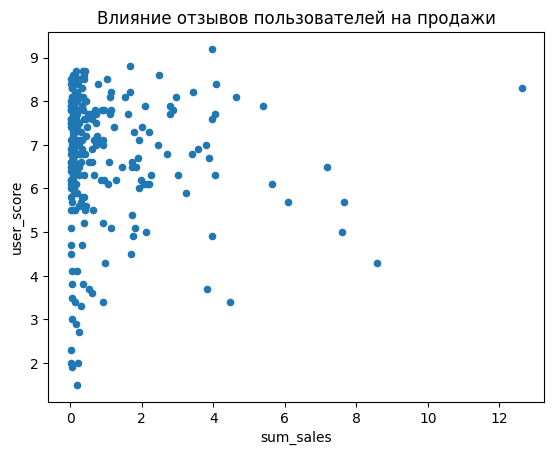

In [50]:
decline_period_data[decline_period_data['platform'] == 'ps4'].plot(x='sum_sales', y='user_score', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи')
plt.show()


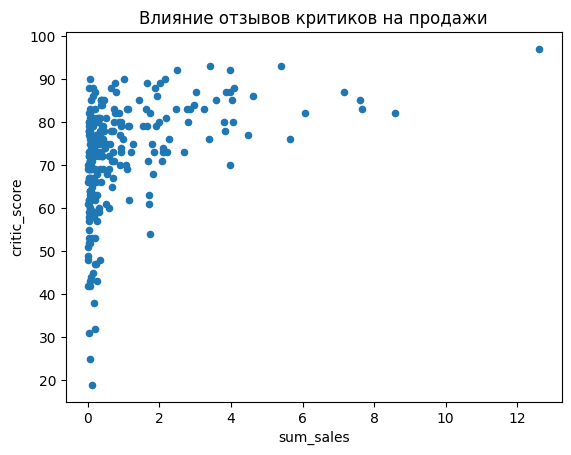

In [51]:
decline_period_data[decline_period_data['platform'] == 'ps4'].plot(x='sum_sales', y='critic_score', kind='scatter')
plt.title('Влияние отзывов критиков на продажи')
plt.show()

In [52]:
display("Коэффициент корреляции между продажами и оценкой пользователей: ",
    decline_period_data[decline_period_data['platform'] == 'ps4']['sum_sales']
        .corr(decline_period_data[decline_period_data['platform'] == 'ps4']['user_score'])
)
display("Коэффициент корреляции между продажами и оценкой критиков: ",
    decline_period_data[decline_period_data['platform'] == 'ps4']['sum_sales']
        .corr(decline_period_data[decline_period_data['platform'] == 'ps4']['critic_score'])
)

'Коэффициент корреляции между продажами и оценкой пользователей: '

-0.03195711020455643

'Коэффициент корреляции между продажами и оценкой критиков: '

0.4065679020617816

На объем продаж намного меньше влияют оценки пользователей, чем оценки критиков. 

**Соотнесём выводы с продажами игр на других платформах.**

Для подтверждения предположения, повторим графики для еще двух популярных платформ.


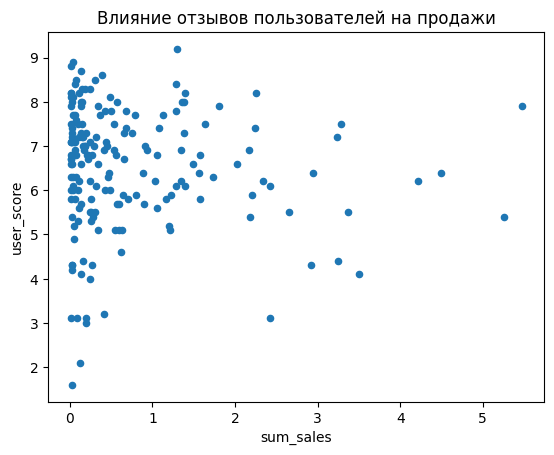

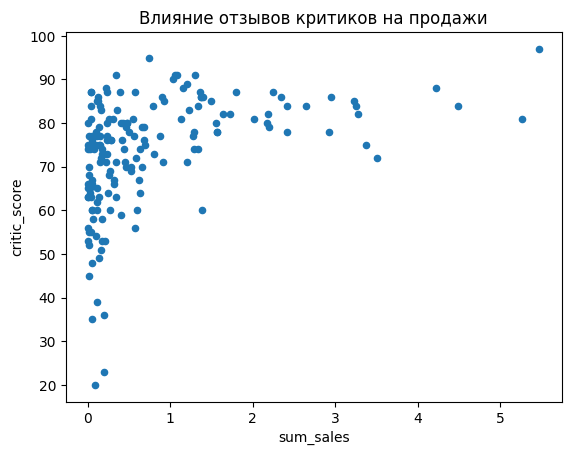

In [53]:
decline_period_data[decline_period_data['platform'] == 'xone'].plot(x='sum_sales', y='user_score', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи');
decline_period_data[decline_period_data['platform'] == 'xone'].plot(x='sum_sales', y='critic_score', kind='scatter')
plt.title('Влияние отзывов критиков на продажи');

In [54]:
display("Коэффициент корреляции между продажами и оценкой пользователей: ",
    decline_period_data[decline_period_data['platform'] == 'xone']['sum_sales']
        .corr(decline_period_data[decline_period_data['platform'] == 'xone']['user_score'])
)
display("Коэффициент корреляции между продажами и оценкой критиков: ",
    decline_period_data[decline_period_data['platform'] == 'xone']['sum_sales']
        .corr(decline_period_data[decline_period_data['platform'] == 'xone']['critic_score'])
)

'Коэффициент корреляции между продажами и оценкой пользователей: '

-0.06892505328279415

'Коэффициент корреляции между продажами и оценкой критиков: '

0.41699832800840164

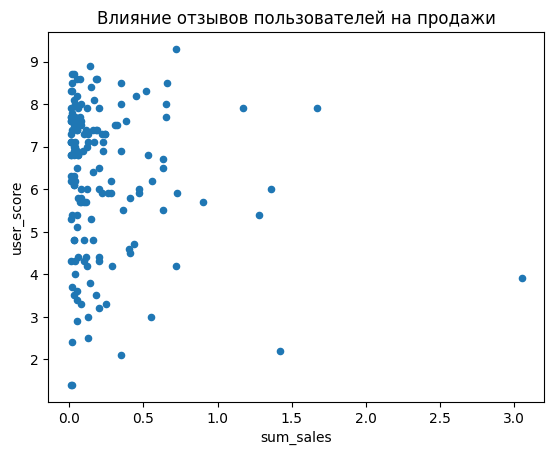

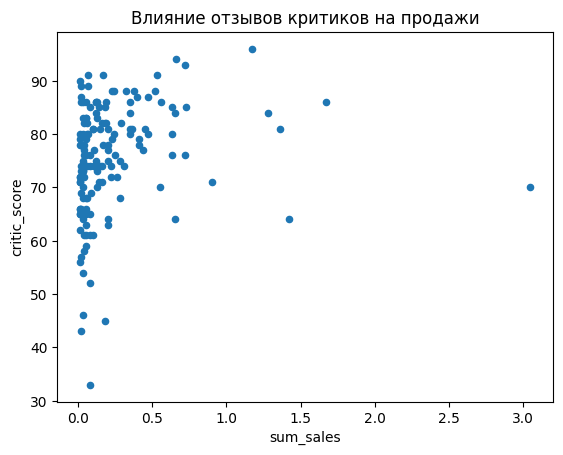

In [55]:
decline_period_data[decline_period_data['platform'] == 'pc'].plot(x='sum_sales', y='user_score', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи');
decline_period_data[decline_period_data['platform'] == 'pc'].plot(x='sum_sales', y='critic_score', kind='scatter')
plt.title('Влияние отзывов критиков на продажи');

In [56]:
display("Коэффициент корреляции между продажами и оценкой пользователей: ",
    decline_period_data[decline_period_data['platform'] == 'pc']['sum_sales']
        .corr(decline_period_data[decline_period_data['platform'] == 'pc']['user_score'])
)
display("Коэффициент корреляции между продажами и оценкой критиков: ",
    decline_period_data[decline_period_data['platform'] == 'pc']['sum_sales']
        .corr(decline_period_data[decline_period_data['platform'] == 'pc']['critic_score'])
)

'Коэффициент корреляции между продажами и оценкой пользователей: '

-0.08999775678448745

'Коэффициент корреляции между продажами и оценкой критиков: '

0.19965984836380177

Результат схож, однако на ПК мы видим, что мнение критиков влияет меньше, чем на игровых консолях.

**Посмотрим на общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?**

In [57]:
decline_period_data['genre'].value_counts()

action          769
role-playing    292
adventure       245
sports          214
shooter         187
misc            156
racing           85
fighting         80
platform         74
simulation       62
strategy         56
puzzle           17
Name: genre, dtype: int64

Абсолютным лидером можно назвать "action" ( action в переводе с англ. — «действие» или боевик по аналогии с киножанром). В целом это логично, так как такой тип игр характерен для консолей и может включать в себя огромный спектр игр, т.к. довольно часто игры включают в себя несколько жанров, например actionRPG.

Проверим объёмы продаж по жанрам.



In [58]:
(
    decline_period_data
    .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
    .sort_values('sum_sales', ascending=False)
)

,sum_sales
genre,
action,322.50
shooter,232.98
sports,150.65
role-playing,145.89
misc,63.06
platform,42.63
racing,39.89
fighting,35.31
adventure,23.64


Наиболее ярко выделяются action, shooter, sports, role-playing. Опять же, считаю, что это связано с тем, что игры могут включать в себя много жанров. Отдельно выделю спортивные игры - зачастую их покупают люди, которые не считают себя геймерами, а скорее хотят приятно расслабиться в компании после работы.

Посмотрим на жанры в цифрах.

In [59]:
decline_period_data.groupby('genre')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
action,769.0,0.419376,1.251546,0.01,0.03,0.110,0.3400,21.05
adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
misc,156.0,0.404231,1.004815,0.01,0.03,0.105,0.3300,9.18
platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
role-playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


Можно сделать следующий вывод - один из самых беспроигрышных жанров является shooter.

**Вывод**

Большая часть выпущенных игр в представленной выборке приходится на период с 2000 до 2016 года, при этом пиком можно считать конец двухтысячных годов.

Периодичность "жизненного" цикла игровых платформ составляет 6-10 лет.

Перспективные платформы (находятся в зоне роста или стагнации по продажам): PS4, XOne, PC.

Связь между продажами и оценкой пользователей довольно слабая.
Мнение критиков больше влияет на продажи.

Жанры-лидеры по представленности в выборке - Action, Role-Playing, Adventure, Sports, Shooter.

Наиболее прибыльный жанр: Shooter.


 **Составим портрет пользователя каждого региона**
    
   * <a href='#step_4.1'>Определим для пользователя каждого региона (NA, EU, JP):</a>
       * <a href='#step_4.2'>Самые популярные платформы (топ-5). Опишем различия в долях продаж.</a>
       * <a href='#step_4.3'>Самые популярные жанры (топ-5). Поясним разницу.</a>
       * <a href='#step_4.4'>Влияет ли рейтинг ESRB на продажи в отдельном регионе?</a>
   * <a href='#step_4.end'>Вывод</a>
   

In [60]:
decline_period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


**Самые популярные платформы (топ-5). Опишем различия в долях продаж.**

In [61]:
display(
    decline_period_data
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .head()
)
display(
    decline_period_data
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .head()
)
display(
    decline_period_data
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .head()
)

,na_sales
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20


,eu_sales
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96


,jp_sales
platform,
3ds,67.81
ps3,23.35
psv,18.59
ps4,15.96
wiiu,10.88


In [62]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = decline_period_data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'red', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

Cамые популярные платформы (топ-5)


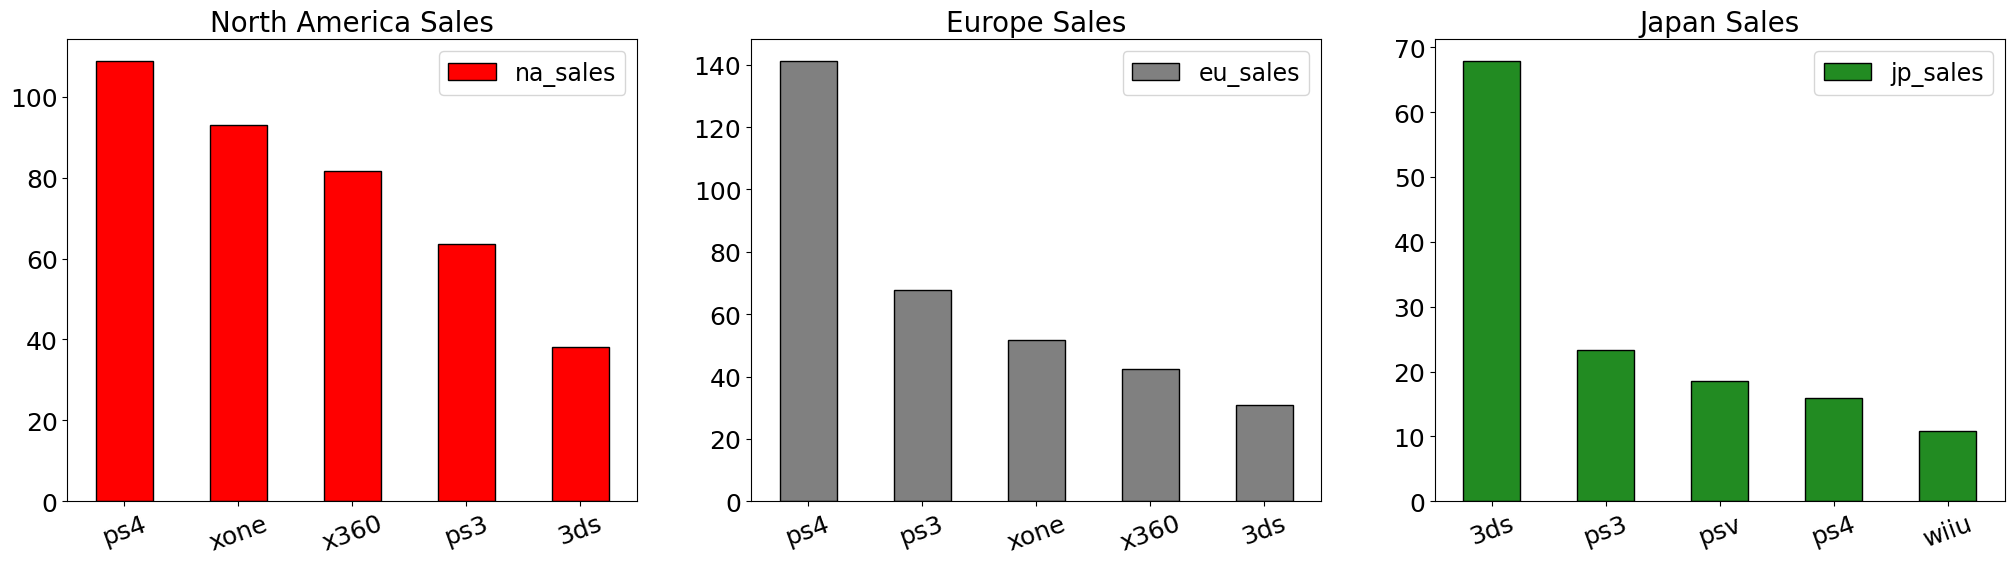

In [63]:
print ('Cамые популярные платформы (топ-5)')
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В Америке наиболее популярными являются PS4, XOne, X360. Это логично, учитывая, что эта страна является родиной платформы от Майкрософта.

В Европе более популярны японские консоли. 

В Японии очень популярны отечественные платформы, при этом наибольшей популярностью обладают портативные консоли.


**Самые популярные жанры (топ-5). Поясним разницу.**

In [64]:
display(
    decline_period_data
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .head()
)
display(
    decline_period_data
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .head()
)
display(
    decline_period_data
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .head()
)

,na_sales
genre,
action,126.13
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49


,eu_sales
genre,
action,118.61
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19


,jp_sales
genre,
role-playing,51.04
action,40.49
misc,9.44
fighting,7.65
shooter,6.61


Cамые популярные платформы (топ-5)


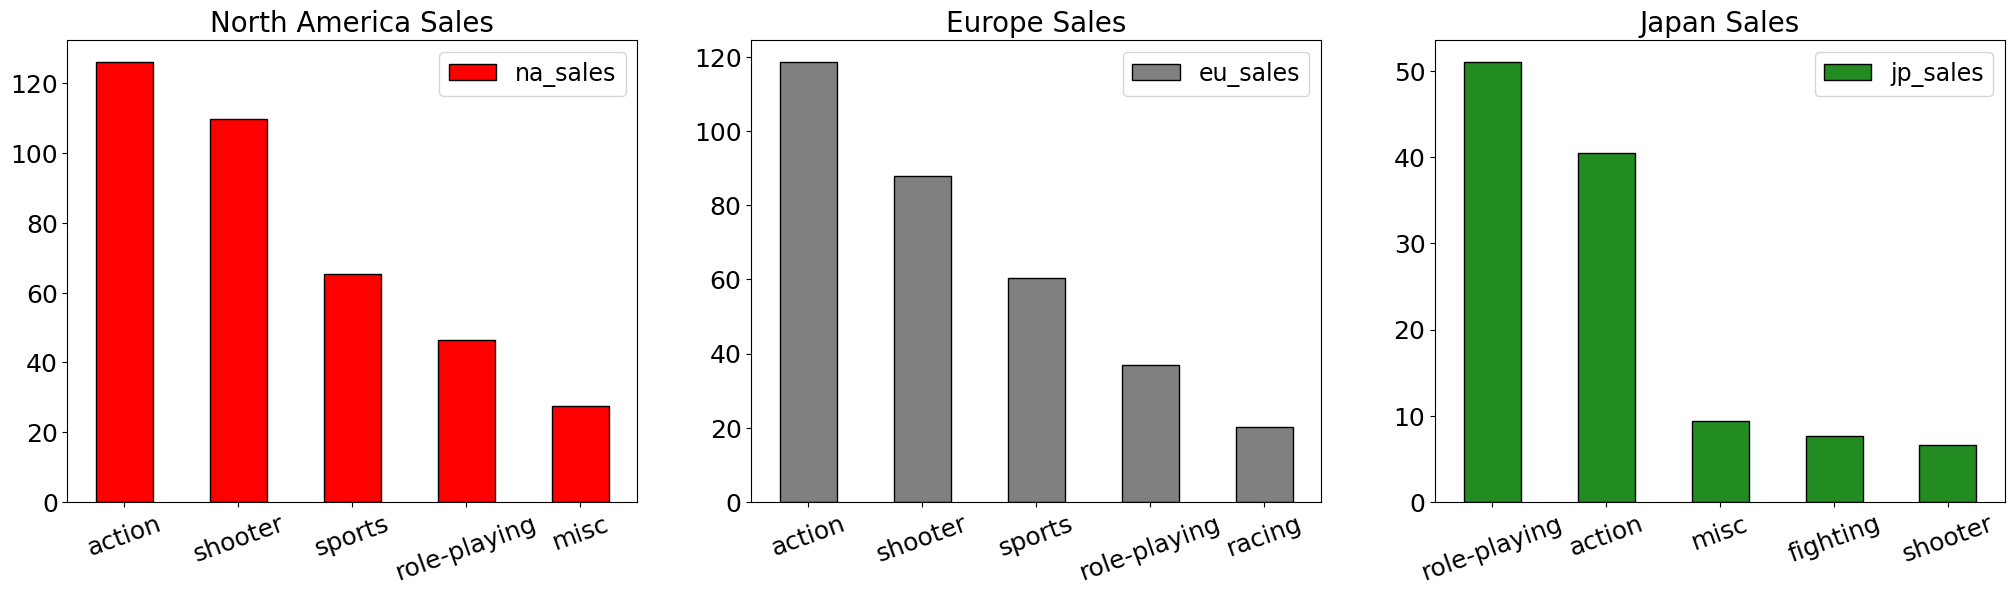

In [65]:
print ('Cамые популярные платформы (топ-5)')
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

В целом вкусы у американцев и европейцев примерно схожи. 

В Японии наиболее популярно РПГ, но это не удивительно - у них есть даже собственное ответвление в жанре "JRPG"

Наиболее популярный жанр action


**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

*Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.*

*Рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кинофильмов. Рейтинг игры напечатан на упаковке, содержится в её рекламе и указан на сайте игры. Компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж, так как её содержимое может значительно измениться в ходе разработки.*


*«EC» («Early childhood») — «Для детей младшего возраста»*

*«E» («Everyone») — «Для всех»*

*«E10+» («Everyone 10 and older») - «Для всех от 10 лет и старше»*

*«M» («Mature») — «Для взрослых»*

*«AO» («Adults Only 18+»)*

*«RP» («Rating Pending») — «Рейтинг ожидается»*

*«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»*

,na_sales
rating,
M,165.29
unknown,89.42
E,79.05
E10+,54.24
T,49.79


,eu_sales
rating,
M,145.80
E,83.36
unknown,78.91
E10+,42.69
T,41.95


,jp_sales
rating,
unknown,85.29
T,20.59
E,15.14
M,14.11
E10+,5.89


Cамые популярные платформы (топ-5)


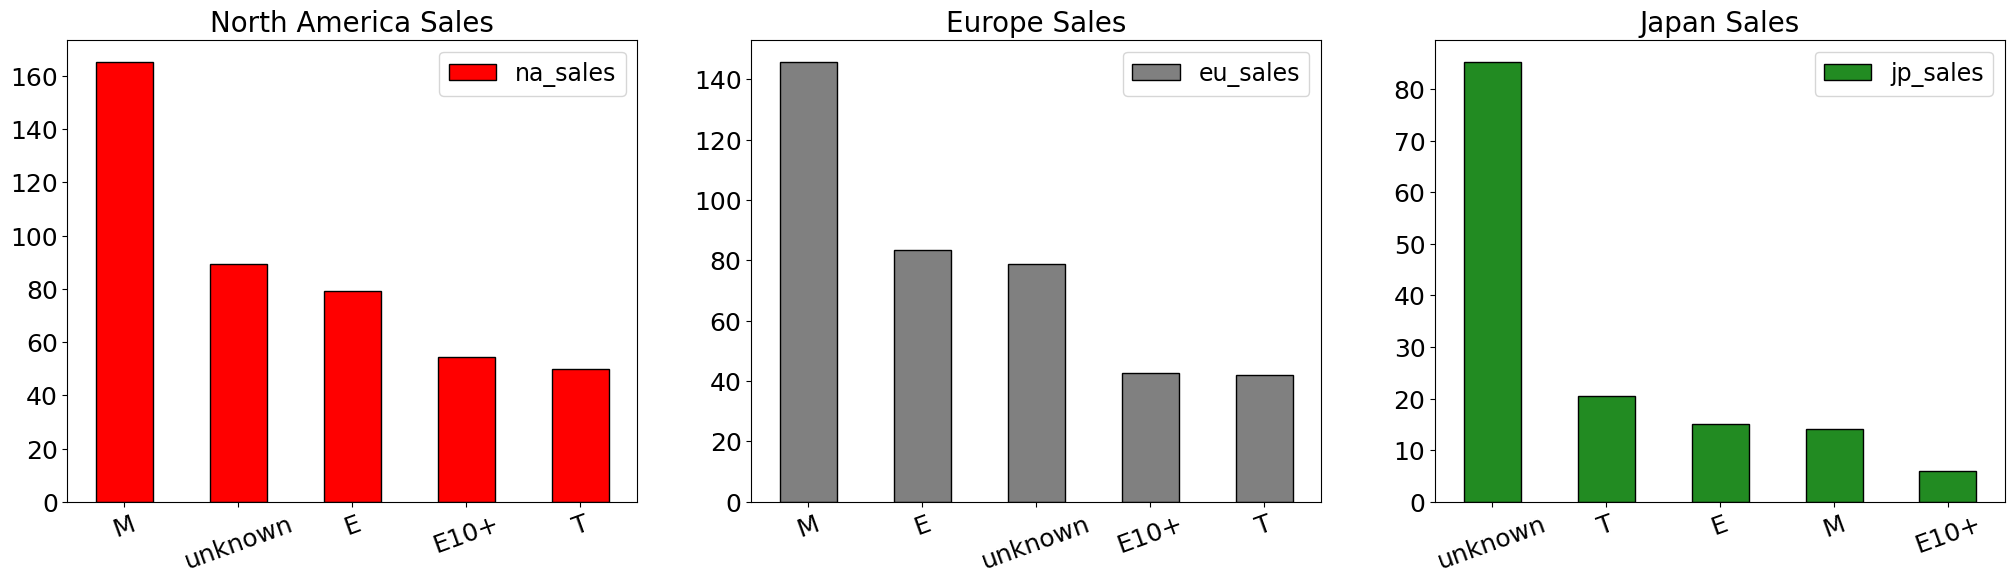

In [66]:
display(
    decline_period_data
    .pivot_table(index=['rating'], values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .head(10)
)
display(
    decline_period_data
    .pivot_table(index=['rating'], values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .head(10)
)
display(
    decline_period_data
    .pivot_table(index=['rating'], values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .head(10)
)

print ('Cамые популярные платформы (топ-5)')
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('rating', 'na_sales', 0)
top_in_regions_plot('rating', 'eu_sales', 1)
top_in_regions_plot('rating', 'jp_sales', 2)

В Америке и Европе наиболее популярный рейтинг для игр, которым он был присвоен - «M»  («Mature») — «Для взрослых».
В Японии чаще всего покупают игры без рейтинга. Предполагаю, что это связано с тем, что это игры, направленные исключительно на внутренний рынок (как пример конкретно в Японии очень популярны визуальные новеллы, симуляторы свиданий и т.п. Игры подобных жанров совсем недавно начали чаще выходить на мировой рынок, так что на момент среза базы это вполне рабочая гипотеза. 

Такие же игры есть и в Америке и Европе, но я связываю это, например с разработками инди игр.


**Вывод**

В Америке и Японии предпочитают отечественные платформы, в Европе смешанные показатели.

Самый популярный жанр - Action.

Можно выявить, что в разных регионах популярность по рейтингу отличаются, но я больше связываю это не с популярностью рейтинга как такового, а скорее с популярностью платформ, жанров и культурных особенностей. 

### . Проверим гипотезы
   * <a href='#step_5.1'>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a>
   * <a href='#step_5.2'>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</a>
   * <a href='#step_5.end'>Вывод</a>

Нулевая гипотеза: средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC. 

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [67]:
alpha = .01

results = st.ttest_ind(
    decline_period_data[decline_period_data['platform'] == 'pc']['user_score'].dropna(), 
    decline_period_data[decline_period_data['platform'] == 'xone']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.15503167687396294
Не получилось отвергнуть нулевую гипотезу


Подтверждается нулевая гипотеза. Однако я связываю это с тем, что зачастую одни и теже игры выходят на всех платформах и лишь малая часть обладает экслюзивностью. 

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны. 

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [68]:
alpha = .01

results = st.ttest_ind(
    decline_period_data[decline_period_data['genre'] == 'action']['user_score'].dropna(), 
    decline_period_data[decline_period_data['genre'] == 'sports']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.11729623919141e-28
Отвергаем нулевую гипотезу


Подтверждается альтернативная гипотеза. Связываю это с тем, что игр жанра action намного больше.

**Вывод**

Рейтинги у игр (одной и той же) на разных платформах чаще всего схожи, у жанров Action и Sports  отличаются. 

**Общий вывод**

По итогам исследования можно сказать следующее:

Игр стало выходить больше с начала нулевых и с их конца началось падение количества новых релизов.

Платформа живет 6-10 лет с некоторыми исключениями.

Перспективными платформами на 2017 год являются PS4, XOne, PC.

Практически нет связи между продажами и оценкой пользователей.
Совсем небольшая  связь между продажами и оценками критиков.


В Америке и Японии предпочитают отечественные платформы, в Европе смешанные показатели. При этом в Японии предпочитают портативные приставки.

Самый популярный жанр - Action, а самый продаваемый Shooter. 

Можно выявить, что в разных регионах популярность по рейтингу отличаются, но я больше связываю это не с популярностью рейтинга как такового, а скорее с популярностью платформ, жанров и культурных особенностей и отличий рынка продаж.

Мы смогли определить игра с наиболее популярным жанром, однако я не считаю, что есть прямая связь между продажами и рейтингом.

Оценки пользователей схожи на разных платформах для игр, но при этом различны по жанрам. 

Если давать рекомендации заказчику, то можно сказать следующее:

Во-первых стоит делать упор на рекламу как самих консолей нового поколения, так и игр для них.

Обязательно стоит учитывать то, в каком регионе будет реклама, так как есть разница в предпочтениях по жанру и рейтингах. 

В рекламной компании можно указывать мнение критиков, однако лучше делать упор на особенности игры.